In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
% matplotlib inline


pd.options.display.max_columns = 50

In [2]:
data = pd.read_csv('investments_VC.csv', encoding='iso-8859-1')
data.shape

(54294, 39)

In [3]:
#drop rows with all na values
data.dropna(axis=0, how='all', inplace=True)
data.shape

(49438, 39)

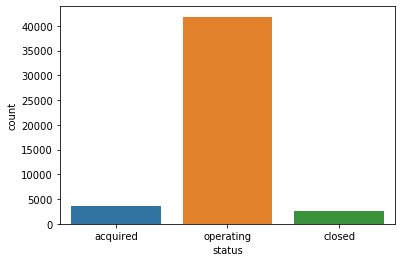

In [4]:
sns.countplot(x='status', data=data)

In [5]:
#target variable
data.status.value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

# Data Cleaning

In [6]:
data.columns = data.columns.str.replace(' ', '') 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49438 entries, 0 to 49437
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
market                  45470 non-null object
funding_total_usd       49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture       

#### Converting to proper datatypes

In [8]:
data[["founded_at"]] = data[["founded_at"]].apply(pd.to_datetime, errors='coerce')
data[["last_funding_at"]] = data[["last_funding_at"]].apply(pd.to_datetime, errors='coerce')
data[["founded_month"]] = data[["founded_month"]].apply(pd.to_datetime, errors='coerce')
data[["first_funding_at"]] = data[["first_funding_at"]].apply(pd.to_datetime, errors='coerce')

In [9]:
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')

#### Dropping unneccessary columns

In [10]:
data.drop(['permalink'], axis=1, inplace=True)

In [11]:
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06-01,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaT,NaT,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10-01,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04-01,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1.0,2013-01-28,2013-01-01,2013-Q1,2013.0,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301,operating,CHN,NaN,Beijing,Beijing,1.0,NaT,NaT,NaN,NaN,2012-04-01,2012-04-01,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5.0,2012-05-13,2012-05-01,2012-Q2,2012.0,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,[a]list games,http://www.alistgames.com,|Games|,Games,9300000,operating,NaN,NaN,NaN,NaN,1.0,NaT,NaT,NaN,NaN,2011-11-21,2011-11-21,9300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature engineering

Add domain name ending as a feature.

In [12]:
new = data["homepage_url"].str[-6:]
data['domain'] = new

In [15]:
data.domain = data.domain.str.split('.', 1)#.str[::-1].str.join(' ')